In [1]:
#импорт необходимых библиотек
import pandas as pd
import datetime
import time
import numpy as np
from collections import Counter
import os
import copy
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from catboost import CatBoostClassifier, Pool
from sklearn import decomposition
import warnings
warnings.simplefilter('ignore')
%matplotlib inline

from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.externals import joblib

In [2]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

# Чтение и нормирование X_train, X_test, y_train, y_test

In [103]:
marked_dataset = pd.read_excel('marked_dataset_old.xlsx')
marked_dataset.drop(columns='class', inplace=True)
ready_dataset_for_marking_last = pd.read_excel('ready_dataset_for_marking_last.xlsx')

marked_dataset = marked_dataset.append(ready_dataset_for_marking_last)
marked_dataset

,0_highes3,0_lowes3,0_highes7,0_lowes7,0_highes15,0_lowes15,0_market_index_rolling,1_highes3,1_lowes3,1_highes7,...,30_highes15,30_lowes15,30_market_index_rolling,31_highes3,31_lowes3,31_highes7,31_lowes7,31_highes15,31_lowes15,31_market_index_rolling
2018-02-15 12:00:00,9,0,0,0,0,0,0.010918,0,24,1,...,0,0,-0.030939,1,7,0,12,0,4,-0.045860
2018-02-15 13:00:00,3,8,4,3,0,1,0.012021,9,0,0,...,2,0,-0.026396,42,0,0,0,0,0,-0.030939
2018-02-15 14:00:00,9,4,2,0,0,0,0.013851,3,8,4,...,0,0,-0.018660,8,9,8,1,2,0,-0.026396
2018-02-15 15:00:00,10,12,3,0,1,0,0.014067,9,4,2,...,11,0,-0.006052,0,1,0,0,0,0,-0.018660
2018-02-15 16:00:00,1,0,1,0,0,0,0.014900,10,12,3,...,1,2,-0.023597,34,1,11,0,11,0,-0.006052
2018-02-16 09:00:00,7,9,7,5,0,1,0.050878,1,0,1,...,1,3,-0.021083,0,11,1,5,1,2,-0.023597
2018-02-16 10:00:00,4,14,6,4,4,1,0.010063,7,9,7,...,2,0,-0.014158,3,11,2,6,1,3,-0.021083
2018-02-16 11:00:00,8,4,6,1,3,0,0.012822,4,14,6,...,3,1,-0.012883,10,1,3,0,2,0,-0.014158
2018-02-16 12:00:00,13,6,14,1,6,0,0.013386,8,4,6,...,1,1,-0.009325,14,11,9,4,3,1,-0.012883
2018-02-16 13:00:00,5,11,1,5,0,0,0.010532,13,6,14,...,0,0,-0.007268,8,4,9,1,1,1,-0.009325


In [3]:
#md = pd.read_excel('принцип_работы_рандом форрест классифайер.xlsx')
#md.head(2)

,model.feature_importances,md.columns,"model = RandomForestClassifier(random_state=50, class_weight={False:0.85, True:0.15},n_estimators=100)"
0,0.021762,31_lowes7,"confusion_matrix(y_test, preds)"
1,0.020284,15_lowes7,"array([[426, 3],\n [ 51, 9]], dtype=..."


In [50]:
#list(md['md.columns'])

['31_lowes7',
 '15_lowes7',
 '22_lowes7',
 '19_lowes7',
 '12_lowes3',
 '13_lowes3',
 '26_lowes7',
 '29_lowes3',
 '16_lowes7',
 '17_lowes3',
 '30_lowes15',
 '8_lowes7',
 '21_lowes3',
 '28_lowes3',
 '25_lowes7',
 '8_lowes3',
 '11_highes7',
 '16_highes15',
 '18_highes15',
 '4_highes3',
 '1_market_index_rolling',
 '2_market_index_rolling',
 '0_highes3',
 '3_market_index_rolling',
 '0_market_index_rolling',
 '3_highes3',
 '2_highes3',
 '1_highes3']

In [104]:
#X = marked_dataset[list(md['md.columns'])]
X = marked_dataset.drop(columns='class')

Y = marked_dataset['class']
#Y = (Y==2)
#Y = (Y==0)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, stratify=Y, random_state=25, test_size=0.06)

In [105]:
#ЖИЗНЕННО ВАЖНОЕ ШКАЛИРОВАНИЕ/НОРМИРОВАНИЕ ДАННЫХ
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [106]:
X.shape

(2492, 224)

In [9]:
y_train.value_counts()

1    1194
0     481
2     162
Name: class, dtype: int64

In [20]:
#pca = decomposition.PCA(n_components=30)
#pca.fit(X_train)
#X_train = pca.transform(X_train)
#X_test=pca.transform(X_test)
#model = RandomForestClassifier(random_state=40, class_weight={False:0.85, True:0.15},n_estimators=100)
#model = model
#y_train_pred = cross_val_predict(model, Xtrain, y_train, cv=4)
#conf = confusion_matrix(y_train, y_train_pred)

# Ковариционные матрицы, понижение размерности

In [56]:
import numpy as np
cov_mat = np.cov(X_train_std.T)
#cov_mat = np.cov(X.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

print('\nEigenvalues \n%s' % eigen_vals)


Eigenvalues 
[2.13131171 1.83946552 1.7819006  1.71392535 1.57247179 0.28342515
 1.40856944 1.20704483 1.18978838 0.50410369 1.09289408 1.06372279
 0.54084501 1.00564467 0.59399921 0.61811544 0.63115117 0.66156385
 0.93978047 0.70308808 0.73235836 0.89626362 0.88065013 0.76343637
 0.8422679  0.79135162 0.80570773 0.82040358]


In [57]:
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

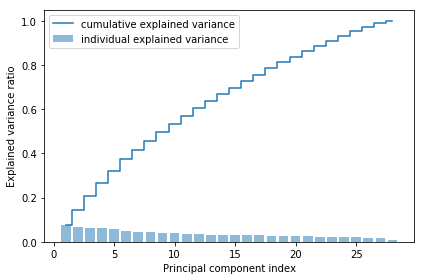

In [59]:
import matplotlib.pyplot as plt


plt.bar(range(1, 29), var_exp, alpha=0.5, align='center',
        label='individual explained variance')
plt.step(range(1, 29), cum_var_exp, where='mid',
         label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
# plt.savefig('images/05_02.png', dpi=300)
plt.show()

In [68]:
np.set_printoptions(precision=4)

mean_vecs = []
for label in range(0, 3):
    mean_vecs.append(np.mean(X_train_std[y_train == label], axis=0))
    print('MV %s: %s\n' % (label, mean_vecs[label - 1]))

MV 0: [-6.1273e-02 -1.1246e-02 -2.9078e-02  3.7496e-02 -2.0810e-02  3.8519e-02
 -4.3918e-01 -8.1234e-02 -3.3992e-03 -4.2943e-02  4.6034e-02 -3.0369e-02
  2.9735e-02 -4.2718e-01 -6.1630e-02 -8.1527e-03 -4.7646e-02 -5.4852e-04
 -1.5213e-02 -3.1271e-03 -3.7773e-01 -4.6837e-02 -2.8801e-03 -1.3047e-02
  6.8093e-03 -1.1874e-02 -2.6250e-03 -3.7501e-01 -4.3223e-02 -3.3827e-02
 -6.8545e-03 -1.6581e-02  3.6234e-04 -3.4915e-02 -3.2779e-01 -2.5156e-02
 -2.9712e-02  1.7627e-02 -3.5760e-02  3.6904e-02 -4.8218e-02 -3.2604e-01
 -3.1395e-02 -1.7193e-02 -1.0475e-02 -6.1366e-03  2.9393e-02 -4.5471e-02
 -3.2619e-01 -3.6767e-02 -1.5907e-02 -1.3185e-02  3.6289e-03  3.0095e-02
 -3.2276e-02 -3.0315e-01 -2.5375e-02 -1.9571e-02 -1.2151e-02 -2.6538e-03
  3.7730e-02 -5.0121e-02 -3.1221e-01 -3.5422e-02 -3.4918e-02 -1.0891e-02
  3.4050e-04  2.1392e-02 -3.1953e-02 -3.0118e-01 -2.3012e-02 -1.0455e-02
 -7.5784e-04  2.0707e-02  4.5476e-02 -1.9682e-02 -2.9025e-01 -1.3349e-02
 -3.2623e-02 -1.5533e-02 -5.2080e-03  1.1512e

In [73]:
[mean_vecs[0][i] / mean_vecs[1][i] for i in range(len(mean_vecs[0]))]

[-4.301825840608689,
 -1.1960844073750734,
 -1.563799270532107,
 -7.339417879417963,
 -1.8627935940748177,
 -30.50834278423908,
 -3.0329565640088947,
 -6.049871231228996,
 1.4209308766631246,
 -2.1923173167794086,
 -2.146488121420972,
 -2.6736396449066593,
 -3.2541235408100184,
 -3.136670634025404,
 -6.34777944833968,
 -2.3507022635735915,
 -1.8171861140134862,
 0.21595348518434115,
 -2.054577964547143,
 -32.53156800534133,
 -3.076281396002887,
 -7.8823301809435575,
 -0.45767717987801293,
 -1.3438373050196877,
 26.415074284683207,
 -14.566256717993497,
 -1.263235974700014,
 -3.0814542630550874,
 -3.9760668341938876,
 -1.3951528946895568,
 -0.8100476084023477,
 -1.545602571842465,
 -0.1426625564556809,
 -2.7970016340924193,
 -2.987716090169675,
 -2.4562600862253583,
 -1.5000185363163936,
 -55.31871378020139,
 -2.644482889520865,
 -3.587378482616546,
 -3.2729336886033713,
 -2.8295616469590636,
 -2.675907742210713,
 -0.9657629393502155,
 -0.8773156813662617,
 -2.76428663284323,
 -3.621784

In [74]:
d = 224 # number of features
S_W = np.zeros((d, d))
for label, mv in zip(range(0, 3), mean_vecs):
    class_scatter = np.zeros((d, d))  # scatter matrix for each class
    for row in X_train_std[y_train == label]:
        row, mv = row.reshape(d, 1), mv.reshape(d, 1)  # make column vectors
        class_scatter += (row - mv).dot((row - mv).T)
    S_W += class_scatter                          # sum class scatter matrices

print('Within-class scatter matrix: %sx%s' % (S_W.shape[0], S_W.shape[1]))

Within-class scatter matrix: 224x224


In [77]:
S_W

array([[ 1.8340e+03, -2.7544e+02,  1.1911e+03, ..., -1.1839e+02,
        -1.9976e+02, -1.8517e+02],
       [-2.7544e+02,  1.8366e+03, -1.5926e+02, ..., -1.9081e+02,
        -9.5393e+01, -1.6821e+02],
       [ 1.1911e+03, -1.5926e+02,  1.8358e+03, ...,  1.2758e+02,
        -3.6362e+01, -1.1206e+02],
       ...,
       [-1.1839e+02, -1.9081e+02,  1.2758e+02, ...,  1.8352e+03,
        -4.6490e-01,  3.1305e+02],
       [-1.9976e+02, -9.5393e+01, -3.6362e+01, ..., -4.6490e-01,
         1.8360e+03, -4.5866e+01],
       [-1.8517e+02, -1.6821e+02, -1.1206e+02, ...,  3.1305e+02,
        -4.5866e+01,  1.8030e+03]])

In [78]:
print('Class label distribution: %s' 
      % np.bincount(y_train)[1:])

Class label distribution: [1194  162]


In [79]:
d = 224  # number of features
S_W = np.zeros((d, d))
for label, mv in zip(range(0, 3), mean_vecs):
    class_scatter = np.cov(X_train_std[y_train == label].T)
    S_W += class_scatter
print('Scaled within-class scatter matrix: %sx%s' % (S_W.shape[0],
                                                     S_W.shape[1]))

Scaled within-class scatter matrix: 224x224


In [82]:
mean_overall = np.mean(X_train_std, axis=0)
d = 224  # number of features
S_B = np.zeros((d, d))
for i, mean_vec in enumerate(mean_vecs):
    n = X_train_std[y_train == i + 1, :].shape[0]
    mean_vec = mean_vec.reshape(d, 1)  # make column vector
    mean_overall = mean_overall.reshape(d, 1)  # make column vector
    S_B += n * (mean_vec - mean_overall).dot((mean_vec - mean_overall).T)

print('Between-class scatter matrix: %sx%s' % (S_B.shape[0], S_B.shape[1]))

Between-class scatter matrix: 224x224


In [83]:
S_B

array([[ 4.5156,  0.8444,  2.1703, ...,  0.7512,  2.9529,  9.2576],
       [ 0.8444,  0.1653,  0.4188, ...,  0.1563,  0.5572,  1.8012],
       [ 2.1703,  0.4188,  1.0656, ...,  0.3886,  1.428 ,  4.5715],
       ...,
       [ 0.7512,  0.1563,  0.3886, ...,  0.1586,  0.502 ,  1.6893],
       [ 2.9529,  0.5572,  1.428 , ...,  0.502 ,  1.9345,  6.1015],
       [ 9.2576,  1.8012,  4.5715, ...,  1.6893,  6.1015, 19.6416]])

In [84]:
eigen_vals, eigen_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

In [85]:
# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i])
               for i in range(len(eigen_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs = sorted(eigen_pairs, key=lambda k: k[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues

print('Eigenvalues in descending order:\n')
for eigen_val in eigen_pairs:
    print(eigen_val[0])

Eigenvalues in descending order:

499.1007876304266
2.720099628220623
2.1894560758704681e-13
1.5375927228922927e-13
1.5375927228922927e-13
1.368316330646844e-13
1.368316330646844e-13
1.302252248039735e-13
1.302252248039735e-13
1.2851184018856133e-13
1.2851184018856133e-13
1.0958768818623444e-13
9.418823269169734e-14
9.418823269169734e-14
8.561374562977535e-14
8.561374562977535e-14
7.908017312617564e-14
7.908017312617564e-14
7.885521574079901e-14
7.885521574079901e-14
7.287089117543769e-14
7.287089117543769e-14
7.148563965956199e-14
7.148563965956199e-14
6.063917398781064e-14
6.063917398781064e-14
6.024909031329756e-14
6.024909031329756e-14
5.803414655155799e-14
5.803414655155799e-14
5.314383279902406e-14
5.314383279902406e-14
5.177728878412376e-14
5.1340366966340443e-14
4.318615988730169e-14
4.318615988730169e-14
3.396363189659435e-14
3.396363189659435e-14
3.27454242999058e-14
2.948521902566735e-14
2.948521902566735e-14
2.9261051230667075e-14
2.9261051230667075e-14
2.8532036658064655e-

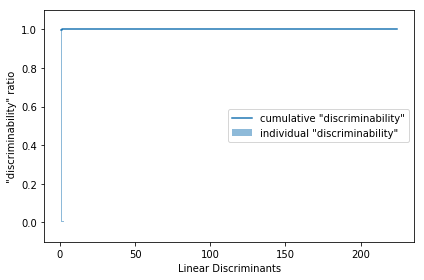

In [87]:
tot = sum(eigen_vals.real)
discr = [(i / tot) for i in sorted(eigen_vals.real, reverse=True)]
cum_discr = np.cumsum(discr)

plt.bar(range(1, 225), discr, alpha=0.5, align='center',
        label='individual "discriminability"')
plt.step(range(1, 225), cum_discr, where='mid',
         label='cumulative "discriminability"')
plt.ylabel('"discriminability" ratio')
plt.xlabel('Linear Discriminants')
plt.ylim([-0.1, 1.1])
plt.legend(loc='best')
plt.tight_layout()
# plt.savefig('images/05_07.png', dpi=300)
plt.show()

In [88]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis].real,
              eigen_pairs[1][1][:, np.newaxis].real))
print('Matrix W:\n', w)

Matrix W:
 [[ 0.0476  0.0564]
 [-0.045  -0.0269]
 [-0.0832 -0.0011]
 [-0.0215  0.079 ]
 [-0.0593 -0.0054]
 [ 0.0759 -0.0514]
 [ 0.3829  0.0497]
 [ 0.0655  0.1187]
 [-0.0539 -0.0363]
 [-0.0608 -0.0113]
 [-0.005   0.107 ]
 [-0.0559 -0.0337]
 [ 0.0791 -0.0299]
 [ 0.2789  0.0593]
 [ 0.044   0.1672]
 [-0.097  -0.08  ]
 [ 0.0155 -0.073 ]
 [ 0.0855  0.0871]
 [-0.1173 -0.0192]
 [ 0.0833  0.0061]
 [ 0.1703  0.0074]
 [ 0.029   0.1011]
 [-0.0729 -0.077 ]
 [-0.0471 -0.0047]
 [ 0.0144  0.0767]
 [-0.0365 -0.0369]
 [ 0.0811 -0.0106]
 [ 0.1562  0.0725]
 [ 0.0132  0.0769]
 [-0.0572 -0.128 ]
 [-0.0252 -0.0378]
 [-0.003   0.0352]
 [-0.0541 -0.0418]
 [ 0.1053 -0.0052]
 [ 0.0934  0.0326]
 [-0.0183  0.0413]
 [-0.0978 -0.1473]
 [-0.0717 -0.0161]
 [ 0.0444  0.0624]
 [-0.0418 -0.0653]
 [ 0.0925 -0.0039]
 [ 0.1177 -0.0222]
 [-0.0685  0.0411]
 [-0.0683 -0.149 ]
 [ 0.0037 -0.0319]
 [-0.013   0.0692]
 [-0.0514 -0.0696]
 [ 0.114  -0.0296]
 [ 0.0719  0.0035]
 [-0.0773  0.0172]
 [-0.045  -0.1921]
 [-0.0177 -0.02  ]
 

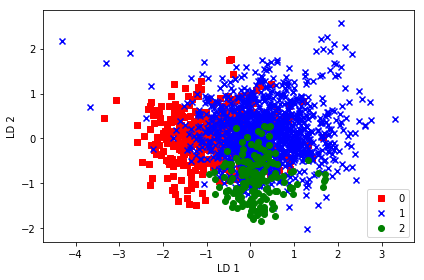

In [89]:
X_train_lda = X_train_std.dot(w)
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_lda[y_train == l, 0],
                X_train_lda[y_train == l, 1] * (-1),
                c=c, label=l, marker=m)

plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower right')
plt.tight_layout()
# plt.savefig('images/05_08.png', dpi=300)
plt.show()

In [91]:
w.shape

(224, 2)

# LDA

In [10]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda4 = LDA(n_components=4)
lda2 = LDA(n_components=2)
X_train_lda4 = lda4.fit_transform(X_train_std, y_train)
X_train_lda2 = lda2.fit_transform(X_train_std, y_train)

In [15]:
X_train_lda2

array([[ 0.61222136,  1.09230684],
       [-2.71514414, -0.45413535],
       [-3.01466522,  0.68551379],
       ...,
       [-0.02350658, -1.80863929],
       [-0.72571905, -1.13027415],
       [ 0.12765471,  0.83046532]])

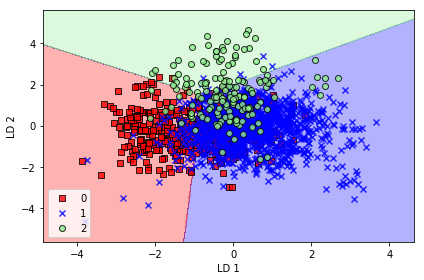

In [101]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

from xgboost import XGBClassifier
xgb_clf = XGBClassifier()

model = xgb_clf

model = model.fit(X_train_lda2, y_train)

plot_decision_regions(X_train_lda2, y_train, classifier=model)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('images/05_09.png', dpi=300)
plt.show()

In [17]:
from xgboost import XGBClassifier
xgb_clf = XGBClassifier()
y_train_pred = cross_val_predict(xgb_clf, X_train_lda2, y_train, cv=4)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[ 237,  239,    5],
       [  74, 1099,   21],
       [  11,   74,   77]], dtype=int64)

In [ ]:
array([[ 237,  239,    5],
       [  74, 1099,   21],
       [  11,   74,   77]], dtype=int64)

In [104]:
xgb_clf = XGBClassifier()
y_train_pred = cross_val_predict(xgb_clf, X_train_std, y_train, cv=4)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[ 237,  243,    1],
       [ 106, 1085,    3],
       [  25,  131,    6]], dtype=int64)

In [32]:
df=pd.DataFrame({'proba':[i[2] for i in probas], 'y_train_pred':predictions}, index=ready_dataset_for_marking.index)
#df.sort_index(inplace=True)
df[df.y_train_pred==2]

,proba,y_train_pred
2019-03-14 15:00:00,0.496720,2
2019-04-05 12:00:00,0.913417,2
2019-04-05 13:00:00,0.636789,2
2019-04-05 14:00:00,0.836300,2
2019-04-05 16:00:00,0.869150,2
2019-04-09 12:00:00,0.870191,2
2019-04-10 13:00:00,0.750605,2
2019-04-10 15:00:00,0.574631,2
2019-04-10 16:00:00,0.862566,2
2019-04-11 10:00:00,0.827419,2


In [22]:
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train_lda2, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='multi:softprob', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [25]:
X_t = scaler.transform(ready_dataset_for_marking)
X_t = lda2.transform(X_t)

In [27]:
predictions = xgb_clf.predict(X_t)
predictions

array([1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 1,
       1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 1, 2, 2, 2, 2,

In [30]:
probas = xgb_clf.predict_proba(X_t)

# Ядерный анализ главных компонентов

In [33]:
from scipy.spatial.distance import pdist, squareform
from scipy import exp
from scipy.linalg import eigh
import numpy as np

def rbf_kernel_pca(X, gamma, n_components):
    """
    RBF kernel PCA implementation.

    Parameters
    ------------
    X: {NumPy ndarray}, shape = [n_samples, n_features]
        
    gamma: float
      Tuning parameter of the RBF kernel
        
    n_components: int
      Number of principal components to return

    Returns
    ------------
     X_pc: {NumPy ndarray}, shape = [n_samples, k_features]
       Projected dataset   

    """
    # Calculate pairwise squared Euclidean distances
    # in the MxN dimensional dataset.
    sq_dists = pdist(X, 'sqeuclidean')

    # Convert pairwise distances into a square matrix.
    mat_sq_dists = squareform(sq_dists)

    # Compute the symmetric kernel matrix.
    K = exp(-gamma * mat_sq_dists)

    # Center the kernel matrix.
    N = K.shape[0]
    one_n = np.ones((N, N)) / N
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)

    # Obtaining eigenpairs from the centered kernel matrix
    # scipy.linalg.eigh returns them in ascending order
    eigvals, eigvecs = eigh(K)
    eigvals, eigvecs = eigvals[::-1], eigvecs[:, ::-1]

    # Collect the top k eigenvectors (projected samples)
    X_pc = np.column_stack((eigvecs[:, i]
                            for i in range(n_components)))

    return X_pc

In [148]:
X, y = X_train_std, y_train

In [118]:
y = np.where(y==2,1,0)
y

array([0, 0, 0, ..., 0, 0, 0])

In [150]:
len([i for i in y if i==2])

162

In [120]:
y_train.value_counts()

1    1194
0     481
2     162
Name: class, dtype: int64

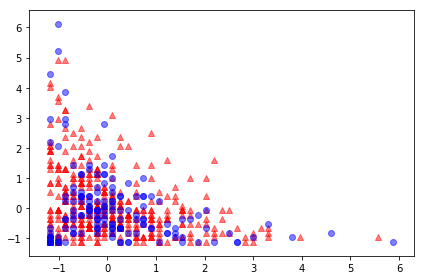

In [152]:
import matplotlib.pyplot as plt
#from sklearn.datasets import make_moons

#X, y = make_moons(n_samples=100, random_state=123)

plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red', marker='^', alpha=0.5)
plt.scatter(X[y == 2, 0], X[y == 2, 1], color='blue', marker='o', alpha=0.5)

plt.tight_layout()
# plt.savefig('images/05_12.png', dpi=300)
plt.show()

In [52]:
y=np.where(y==0,0,1)
y

array([1, 0, 0, ..., 1, 0, 1])

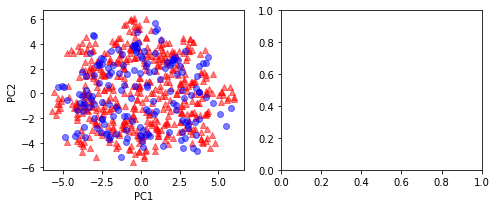

In [153]:
from sklearn.decomposition import PCA

scikit_pca = PCA(n_components=2)
X_spca = scikit_pca.fit_transform(X)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))

ax[0].scatter(X_spca[y == 0, 0], X_spca[y == 0, 1],
              color='red', marker='^', alpha=0.5)
ax[0].scatter(X_spca[y == 2, 0], X_spca[y == 2, 1],
              color='blue', marker='o', alpha=0.5)

#ax[1].scatter(X_spca[y == 0, 0], np.zeros((int(1838/2), 1)) + 0.02,
              #color='red', marker='^', alpha=0.5)
#ax[1].scatter(X_spca[y == 1, 0], np.zeros((int(1838/2), 1)) - 0.02,
             # color='blue', marker='o', alpha=0.5)

ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
#ax[1].set_ylim([-1, 1])
#ax[1].set_yticks([])
#ax[1].set_xlabel('PC1')

plt.tight_layout()
# plt.savefig('images/05_13.png', dpi=300)
plt.show()

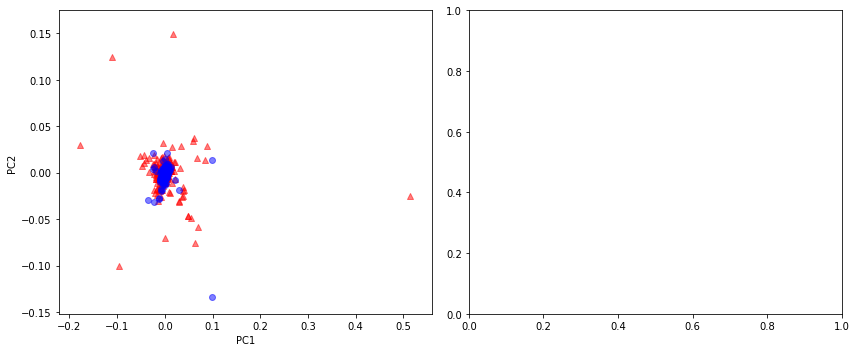

In [154]:
X_kpca = rbf_kernel_pca(X, gamma=10, n_components=2)

fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(12,5))
ax[0].scatter(X_kpca[y==0, 0], X_kpca[y==0, 1], 
            color='red', marker='^', alpha=0.5)
ax[0].scatter(X_kpca[y==2, 0], X_kpca[y==2, 1],
            color='blue', marker='o', alpha=0.5)

#ax[1].scatter(X_kpca[y==0, 0], np.zeros((50,1))+0.02, 
           # color='red', marker='^', alpha=0.5)
#ax[1].scatter(X_kpca[y==1, 0], np.zeros((50,1))-0.02,
          #  color='blue', marker='o', alpha=0.5)

ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
#ax[1].set_ylim([-1, 1])
#ax[1].set_yticks([])
#ax[1].set_xlabel('PC1')

plt.tight_layout()
# plt.savefig('images/05_14.png', dpi=300)
plt.show()

In [162]:
from sklearn.manifold import MDS
embedding = MDS(n_components=3, max_iter=100)
X_transformed = embedding.fit_transform(X)
X_transformed.shape

(1837, 3)

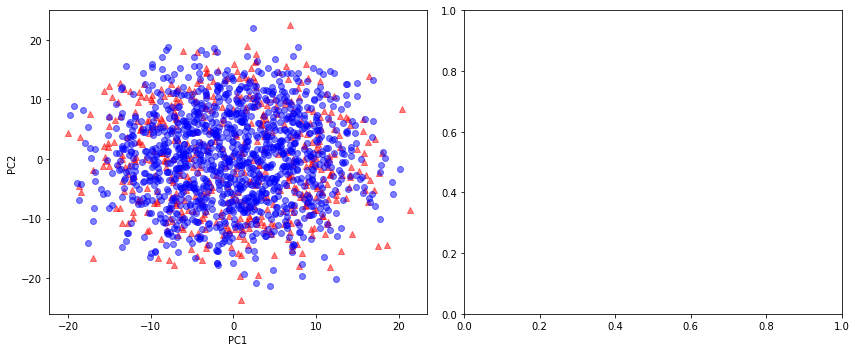

In [167]:
fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(12,5))
ax[0].scatter(X_transformed[y==0, 0], X_transformed[y==0, 1], 
            color='red', marker='^', alpha=0.5)
ax[0].scatter(X_transformed[y==1, 0], X_transformed[y==1, 1],
            color='blue', marker='o', alpha=0.5)

#ax[1].scatter(X_kpca[y==0, 0], np.zeros((50,1))+0.02, 
           # color='red', marker='^', alpha=0.5)
#ax[1].scatter(X_kpca[y==1, 0], np.zeros((50,1))-0.02,
          #  color='blue', marker='o', alpha=0.5)

ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
#ax[1].set_ylim([-1, 1])
#ax[1].set_yticks([])
#ax[1].set_xlabel('PC1')

plt.tight_layout()
# plt.savefig('images/05_14.png', dpi=300)
plt.show()

# Последовательный выбор признаков

In [9]:
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


class SBS():
    def __init__(self, estimator, k_features, scoring=accuracy_score,
                 test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state

    def fit(self, X, y):
        
        X_train, X_test, y_train, y_test = \
            train_test_split(X, y, test_size=self.test_size,
                             random_state=self.random_state)

        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train, 
                                 X_test, y_test, self.indices_)
        self.scores_ = [score]

        while dim > self.k_features:
            scores = []
            subsets = []

            for p in combinations(self.indices_, r=dim - 1):
                score = self._calc_score(X_train, y_train, 
                                         X_test, y_test, p)
                scores.append(score)
                subsets.append(p)

            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1

            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]

        return self

    def transform(self, X):
        return X[:, self.indices_]

    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score

In [10]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
# selecting features
sbs = SBS(forest_clf, k_features=10)
sbs.fit(X_train, y_train)

In [11]:
sbs.subsets_

[(0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27),
 (0,
  1,
  2,
  3,
  4,
  5,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27),
 (0,
  1,
  2,
  3,
  4,
  5,
  7,
  8,
  9,
  10,
  11,
  12,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27),
 (0,
  1,
  2,
  3,
  4,
  5,
  7,
  8,
  9,
  10,
  11,
  12,
  14,
  15,
  16,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27),
 (0,
  1,
  2,
  3,
  4,
  5,
  7,
  8,
  10,
  11,
  12,
  14,
  15,
  16,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27),
 (0,
  1,
  2,
  3,
  4,
  5,
  7,
  8,
  10,
  11,
  12,
  14,
  15,
  16,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  27),
 (0,
  1,
  2,
  3,
  4,
  5,
  7,
  8,
  10,
  12,
  14,
  15,
  16,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  27),
 (0,

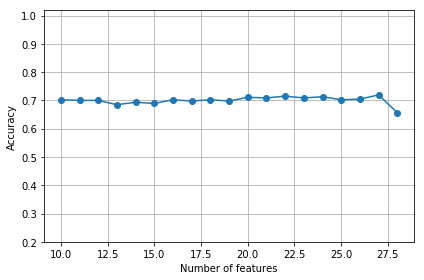

In [13]:
# plotting performance of feature subsets
k_feat = [len(k) for k in sbs.subsets_]

plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.2, 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
# plt.savefig('images/04_08.png', dpi=300)
plt.show()

In [16]:
k3 = list(sbs.subsets_[18])
#print(df_wine.columns[1:][k3])

In [17]:
k3

[1, 4, 5, 8, 10, 16, 19, 20, 23, 24]

In [21]:
list(md['md.columns'])

['31_lowes7',
 '15_lowes7',
 '22_lowes7',
 '19_lowes7',
 '12_lowes3',
 '13_lowes3',
 '26_lowes7',
 '29_lowes3',
 '16_lowes7',
 '17_lowes3',
 '30_lowes15',
 '8_lowes7',
 '21_lowes3',
 '28_lowes3',
 '25_lowes7',
 '8_lowes3',
 '11_highes7',
 '16_highes15',
 '18_highes15',
 '4_highes3',
 '1_market_index_rolling',
 '2_market_index_rolling',
 '0_highes3',
 '3_market_index_rolling',
 '0_market_index_rolling',
 '3_highes3',
 '2_highes3',
 '1_highes3']

In [19]:
forest_clf.fit(X_train, y_train)
print('Training accuracy:', forest_clf.score(X_train, y_train))
print('Test accuracy:', forest_clf.score(X_test, y_test))

Training accuracy: 0.9863908546543277
Test accuracy: 0.6949152542372882


In [20]:
forest_clf.fit(X_train[:, k3], y_train)
print('Training accuracy:', forest_clf.score(X_train[:, k3], y_train))
print('Test accuracy:', forest_clf.score(X_test[:, k3], y_test))

Training accuracy: 0.9858464888405009
Test accuracy: 0.7033898305084746


# Выявление гиперпараметров моделей

In [17]:
from xgboost import XGBClassifier
xgb_clf = XGBClassifier()

from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=32, class_weight='balanced')

from sklearn.ensemble import GradientBoostingClassifier
gboost_clf = GradientBoostingClassifier()

from sklearn.naive_bayes import BernoulliNB
bernoulli_clf = BernoulliNB()

from sklearn.linear_model import LogisticRegression
logit = LogisticRegression(penalty='l1',multi_class='multinomial', solver='saga')



#CATBOOST ХОРОШО СЕБЯ ПОКАЗАВШИЙ НЕ ЗАБЫТЬ

#model=linear_model.LogisticRegression(penalty='l1', class_weight={False:0.55, True:0.45}, C=5).fit(X_train,y_train)
#model = RandomForestClassifier(random_state=50, class_weight={0:0.26, 1:0.61, 2:0.13},n_estimators=100)
#model = DecisionTreeClassifier(random_state=50,class_weight={False:0.1, True:0.9})
#model = KNeighborsClassifier(n_neighbors=2)

#params={'iterations' : 200, 'learning_rate' : 0.1,'eval_metric' : 'Accuracy', 'verbose' : True}#'class_weights':[0.4, 0.2, 0.4]}
#cbc=CatBoostClassifier(**params)


from sklearn.svm import SVC
svc = SVC(kernel='rbf', random_state=1, gamma=0.1, C=5)

from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='entropy', 
                              max_depth=5, 
                              random_state=1, class_weight='balanced')

from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(base_estimator=tree, n_estimators=500, learning_rate=0.1, random_state=1)

In [18]:
model=ada
model.fit(X_train,y_train)
preds=model.predict(X_test)
accuracy_score(y_test, preds)

0.7203389830508474

In [20]:
y_train_pred = cross_val_predict(model, X_train_std, y_train, cv=4)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[ 157,  324,    0],
       [  61, 1133,    0],
       [  16,  146,    0]], dtype=int64)

array([[10, 21,  0],
       [ 2, 75,  0],
       [ 0, 10,  0]], dtype=int64)

In [21]:
model.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator__class_weight': 'balanced',
 'base_estimator__criterion': 'entropy',
 'base_estimator__max_depth': 5,
 'base_estimator__max_features': None,
 'base_estimator__max_leaf_nodes': None,
 'base_estimator__min_impurity_decrease': 0.0,
 'base_estimator__min_impurity_split': None,
 'base_estimator__min_samples_leaf': 1,
 'base_estimator__min_samples_split': 2,
 'base_estimator__min_weight_fraction_leaf': 0.0,
 'base_estimator__presort': False,
 'base_estimator__random_state': 1,
 'base_estimator__splitter': 'best',
 'base_estimator': DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
             max_depth=5, max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False, random_state=1,
             splitter='best'),
 'learning_rate': 0.1,
 'n_estimators': 500,
 'random_state': 1}

In [44]:
#param_grid = [{'class_prior': [[0.1, 0.8, 0.1], None], 'alpha': [0.01, 0.3, 0.6, 1.0]}]
#param_grid = [{'learning_rate': [0.1], 'max_depth': [5] ,'max_features': [10], 'min_samples_split': [4,6,8]}]
#param_grid = [{'max_depth': [8] ,'max_features': ['auto', 5, 10], 'min_samples_split': [2,6,8], 'n_estimators': [10,100], 'class_weight': [None, {0:0.1, 1:0.8, 2:0.1}] }]
#param_grid = [{'max_depth': [3,5,8]}]
#param_grid = [{'learning_rate': [0.2, 0.5]}]
#param_grid = [{'C': [0.1, 1, 5], 'gamma': [0.1, 1, 10, 100]}]
param_grid = [{'class_weight':[{0:0.26, 1:0.61, 2:0.13}, None], 'max_depth': [3,5,10] ,'max_features': [None, 10,50], 'min_samples_split': [2,6,8]}]

grid_search = GridSearchCV(model, param_grid, cv=4,
                           scoring='balanced_accuracy', return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=4, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'class_weight': [{0: 0.26, 1: 0.61, 2: 0.13}, None], 'max_depth': [3, 5, 10], 'max_features': [None, 10, 50], 'min_samples_split': [2, 6, 8]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='balanced_accuracy', verbose=0)

In [45]:
grid_search.best_params_

{'class_weight': None,
 'max_depth': 10,
 'max_features': None,
 'min_samples_split': 2}

In [39]:
#model = RandomForestClassifier(random_state=32, class_weight='balanced')
#model = SVC(kernel='rbf', random_state=10, gamma=0.1, C=100)
#model = RandomForestClassifier(random_state=52)
model = DecisionTreeClassifier(criterion='gini', 
                              max_depth=2, 
                              random_state=10, class_weight='balanced')

In [ ]:
array([[ 196,  284,    1],
       [ 128, 1062,    4],
       [  27,  133,    2]], dtype=int64)

In [178]:
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[  61,  413,    7],
       [  87, 1098,    9],
       [  20,  136,    6]], dtype=int64)

In [ ]:
array([[ 237,  243,    1],
       [ 106, 1085,    3],
       [  25,  131,    6]], dtype=int64)

In [28]:
preds=grid_search.best_estimator_.predict(X_test)
accuracy_score(y_test, preds)

0.652542372881356

In [29]:
conf_mx = confusion_matrix(y_test, preds)
conf_mx

array([[ 0, 31,  0],
       [ 0, 77,  0],
       [ 0, 10,  0]], dtype=int64)

In [53]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz

dot_data = export_graphviz(grid_search.best_estimator_, out_file=None) 
graph = graph_from_dot_data(dot_data) 
graph.write_png('tree.png') 

InvocationException: GraphViz's executables not found

In [57]:
import pydotplus

In [60]:
gr = pydotplus.graphviz.graph_from_dot_data(dot_data)

# Встраивание модели МО в веб-приложение

In [22]:
import pickle
import os

dest = os.path.join('movieclassifier', 'pkl_objects')
if not os.path.exists(dest):
    os.makedirs(dest)

pickle.dump(y_train_pred, open(os.path.join(dest, 'stopwords.pkl'), 'wb'), protocol=4)   
pickle.dump(model, open(os.path.join(dest, 'classifier.pkl'), 'wb'), protocol=4)

In [23]:
%%writefile movieclassifier/vectorizer.py
from sklearn.feature_extraction.text import HashingVectorizer
import re
import os
import pickle

cur_dir = os.path.dirname(__file__)
stop = pickle.load(open(
                os.path.join(cur_dir, 
                'pkl_objects', 
                'stopwords.pkl'), 'rb'))

def tokenizer(text):
    text = re.sub('<[^>]*>', '', text)
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)',
                           text.lower())
    text = re.sub('[\W]+', ' ', text.lower()) \
                   + ' '.join(emoticons).replace('-', '')
    tokenized = [w for w in text.split() if w not in stop]
    return tokenized

vect = HashingVectorizer(decode_error='ignore',
                         n_features=2**21,
                         preprocessor=None,
                         tokenizer=tokenizer)

Writing movieclassifier/vectorizer.py


# РЕЗУЛЬТАТЫ на станд. датасете, со снижением размерности и с применением огран. перечня md_columns

bernoulli_clf = BernoulliNB() - параметры по умолчанию

In [ ]:
X_train, cross_validation:
array([[252, 111,  15],
       [259, 501, 118],
       [ 52,  76,  52]],

gboost_clf = GradientBoostingClassifier()

{'learning_rate': 0.1,
 'max_depth': 5,
 'max_features': 10,
 'min_samples_split': 8}

In [ ]:
X_train, cross_validation:
array([[207, 161,  10],
       [ 76, 779,  23],
       [ 15, 105,  60]], dtype=int64)

forest_clf = RandomForestClassifier(random_state=42)

{'class_weight': None,
 'max_depth': 8,
 'max_features': 'auto',
 'min_samples_split': 8,
 'n_estimators': 10}

In [ ]:
X_train, cross_validation:
array([[203, 168,   7],
       [ 74, 793,  11],
       [ 11, 119,  50]], dtype=int64)

xgb_clf = XGBClassifier()

'max_depth': 5

In [ ]:
X_train, cross_validation:
array([[202, 170,   6],
       [ 74, 784,  20],
       [ 17, 113,  50]], dtype=int64)

model=CatBoostClassifier(**params)

params={'iterations' : 330, 'learning_rate' : 0.2,'eval_metric' : 'Accuracy', 'verbose' : True}

In [ ]:
X_train, cross_validation:
array([[205, 168,   5],
       [ 85, 772,  21],
       [ 22, 113,  45]], dtype=int64)

In [ ]:
df=pd.DataFrame({'y_test':y_test, 'preds':preds})#, 'probas':[i for i in model.predict_proba(X_test)]})
df[df.preds==2]

# Визуализация

In [ ]:
# https://tproger.ru/translations/python-data-vizualization/
#
# ПОПРОБОВАТЬ ИСПОЛЬЗОВАТЬ ЭТО, ПО ССЫЛКЕ. БИБЛИОТЕКИ cufflinks plotly ИМПОРТИРОВАЛ

# Конкретная визуализация

In [26]:
mindex = pd.read_excel('marked_dataset_old.xlsx')#, index_col='Date')
mindex.head(3)

,class,0_highes3,0_lowes3,0_highes7,0_lowes7,0_highes15,0_lowes15,0_market_index_rolling,1_highes3,1_lowes3,...,30_highes15,30_lowes15,30_market_index_rolling,31_highes3,31_lowes3,31_highes7,31_lowes7,31_highes15,31_lowes15,31_market_index_rolling
2018-02-15 12:00:00,1,9,0,0,0,0,0,0.010918,0,24,...,0,0,-0.030939,1,7,0,12,0,4,-0.045860
2018-02-15 13:00:00,1,3,8,4,3,0,1,0.012021,9,0,...,2,0,-0.026396,42,0,0,0,0,0,-0.030939
2018-02-15 14:00:00,1,9,4,2,0,0,0,0.013851,3,8,...,0,0,-0.018660,8,9,8,1,2,0,-0.026396


In [49]:
df = pd.DataFrame({'y_test_pred':y_km}, index=mindex.index)
df

,y_test_pred
2018-02-15 12:00:00,2
2018-02-15 13:00:00,2
2018-02-15 14:00:00,1
2018-02-15 15:00:00,1
2018-02-15 16:00:00,2
2018-02-16 09:00:00,0
2018-02-16 10:00:00,0
2018-02-16 11:00:00,0
2018-02-16 12:00:00,2
2018-02-16 13:00:00,2


In [48]:
len(mindex), len(y_km)

(1955, 1955)

In [45]:
df = df[:400]

In [46]:
mask0 = (df.y_test_pred==0)
mask1 = (df.y_test_pred==1)
mask2 = (df.y_test_pred==2)

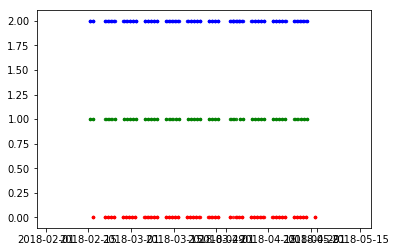

In [47]:
plt.scatter(list(df[mask0].index), list(df[mask0]['y_test_pred']), c='red', label='data', alpha=0.85, s=6)
plt.scatter(list(df[mask1].index), list(df[mask1]['y_test_pred']), c='green', label='data', alpha=0.85, s=6)
plt.scatter(list(df[mask2].index), list(df[mask2]['y_test_pred']), c='blue', label='data', alpha=0.85, s=6)

# Снижение размерности

In [ ]:
X_test.shape

In [ ]:
conf_list=[]
for i in range(3,6,1):
    pca = decomposition.PCA(n_components=i)
    pca.fit(X_train)
    Xtrain = pca.transform(X_train)
    #Xtest=pca.transform(X_test)
    #model = RandomForestClassifier(random_state=40, class_weight={False:0.85, True:0.15},n_estimators=100)
    #model = model
    y_train_pred = cross_val_predict(model, Xtrain, y_train, cv=4)
    conf = confusion_matrix(y_train, y_train_pred)
    
    conf_list.append([conf[1][1], conf[0][1]])
    
    print(conf[2][2], conf[1][2], conf[0][2], 'components = ', i)

# Стекинг

In [19]:
from xgboost import XGBClassifier
xgb_clf = XGBClassifier(max_depth=5)

from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=8,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)


from sklearn.ensemble import GradientBoostingClassifier
gboost_clf = GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=5,
              max_features=10, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=8,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

from sklearn.naive_bayes import BernoulliNB
bernoulli_clf = BernoulliNB()

logit = LogisticRegression(penalty='l1',multi_class='multinomial', solver='saga')

In [21]:
models = [xgb_clf, forest_clf, gboost_clf, bernoulli_clf, logit]
dict_predict = {}
for model in models:
    y_train_pred = cross_val_predict(model, X_train, y_train, cv=4, method='predict_proba')
    dict_predict[str(model)[:9]+' proba_0'] = np.array([i[0] for i in y_train_pred])
    dict_predict[str(model)[:9]+' proba_1'] = np.array([i[1] for i in y_train_pred])
    dict_predict[str(model)[:9]+' proba_2'] = np.array([i[2] for i in y_train_pred])
    
    
dict_predict['y_train'] = np.array(y_train)
df_predictions = pd.DataFrame(dict_predict, index=y_train.index)
df_predictions

,XGBClassi proba_0,XGBClassi proba_1,XGBClassi proba_2,RandomFor proba_0,RandomFor proba_1,RandomFor proba_2,GradientB proba_0,GradientB proba_1,GradientB proba_2,Bernoulli proba_0,Bernoulli proba_1,Bernoulli proba_2,LogisticR proba_0,LogisticR proba_1,LogisticR proba_2,y_train
2018-09-20 09:00:00,0.055210,0.932060,0.012730,0.1,0.8,0.1,0.052993,0.922535,0.024472,3.621220e-09,9.999995e-01,5.293800e-07,0.158272,0.792487,0.049240,1
2018-04-02 13:00:00,0.853105,0.121721,0.025174,0.6,0.4,0.0,0.864828,0.111027,0.024144,9.911368e-01,3.527659e-05,8.827950e-03,0.937378,0.051574,0.011048,0
2018-03-29 14:00:00,0.787622,0.168831,0.043547,0.3,0.3,0.4,0.861239,0.098029,0.040732,9.967147e-01,7.912891e-05,3.206126e-03,0.972891,0.014078,0.013031,0
2018-10-23 15:00:00,0.219339,0.521629,0.259032,0.1,0.5,0.4,0.218121,0.654302,0.127577,9.862191e-01,2.381567e-03,1.139937e-02,0.033033,0.955634,0.011333,0
2018-07-10 14:00:00,0.132438,0.735693,0.131869,0.4,0.6,0.0,0.139840,0.774468,0.085692,9.949418e-01,1.194352e-03,3.863859e-03,0.139233,0.829243,0.031524,2
2019-01-03 16:00:00,0.109651,0.657302,0.233047,0.1,0.6,0.3,0.109196,0.721518,0.169286,8.683886e-09,9.998472e-01,1.527993e-04,0.000241,0.998166,0.001592,1
2018-08-27 16:00:00,0.060263,0.910788,0.028950,0.0,1.0,0.0,0.060962,0.885759,0.053279,5.273305e-09,9.999543e-01,4.570261e-05,0.113256,0.661777,0.224967,1
2018-04-16 14:00:00,0.286951,0.593788,0.119261,0.2,0.5,0.3,0.235898,0.632912,0.131190,9.993497e-01,3.022012e-04,3.480928e-04,0.189821,0.809507,0.000672,1
2018-09-21 13:00:00,0.055484,0.928613,0.015903,0.0,1.0,0.0,0.030911,0.947091,0.021998,2.218537e-09,9.999990e-01,9.872994e-07,0.263493,0.707762,0.028745,1
2018-11-14 13:00:00,0.696935,0.263492,0.039572,0.7,0.2,0.1,0.631204,0.306729,0.062067,9.990233e-01,9.171911e-04,5.946777e-05,0.703732,0.296225,0.000043,1


In [22]:
y_train.value_counts()

1    1194
0     481
2     162
Name: class, dtype: int64

In [23]:
Y_pred = df_predictions['y_train']
X_pred = df_predictions.drop(columns=['y_train'])

In [24]:
xgb_clf_pred = XGBClassifier()
forest_clf_pred = RandomForestClassifier()
gboost_clf_pred = GradientBoostingClassifier()
logit = LogisticRegression(penalty='l1',multi_class='multinomial', solver='saga')

models = [xgb_clf_pred, forest_clf_pred, gboost_clf_pred, logit]

for model in models:
    y_train_pred = cross_val_predict(model, X_pred, Y_pred, cv=4)
    print(str(model)[:9])
    print(confusion_matrix(Y_pred, y_train_pred))

XGBClassi
[[ 252  224    5]
 [ 111 1066   17]
 [  19  120   23]]
RandomFor
[[ 277  199    5]
 [ 159 1016   19]
 [  36  104   22]]
GradientB
[[ 259  215    7]
 [ 119 1049   26]
 [  25  116   21]]
LogisticR
[[ 232  245    4]
 [ 114 1066   14]
 [  25  120   17]]


In [ ]:
XGBClassi
[[ 255  221    5]
 [ 125 1059   10]
 [  25  115   22]]
RandomFor
[[ 258  209   14]
 [ 170 1006   18]
 [  31  111   20]]
GradientB
[[ 258  215    8]
 [ 132 1049   13]
 [  30  110   22]]







XGBClassi
[[227 149   2]
 [ 86 827  12]
 [ 17  82  34]]
RandomFor
[[231 143   4]
 [113 790  22]
 [ 23  79  31]]
GradientB
[[222 152   4]
 [ 93 814  18]
 [ 19  80  34]]

# По результатам стекинга (параметры моделей на последнем шаге по умолчанию) будем оптимизировать на последнем шаге RandomFor

уже при формировании решения, не будет уже кросс-валид.
сразу фит, сохранить модель, потом загрузить модель, потом предикт.

In [181]:
#forest_clf = RandomForestClassifier()
#xgb_clf = XGBClassifier()
gboost_clf = GradientBoostingClassifier()

In [185]:
gboost_clf.get_params()

{'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'auto',
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [186]:
#param_grid = [{'max_depth': [5] ,'max_features': [3,5,'auto'], 'min_samples_split': [6],
#               'n_estimators': [50,100, 150], 'class_weight': [None, {0:0.26, 1:0.61, 2:0.13}] }]
#param_grid = [{'max_depth': [30, 24, 18]}]
param_grid = [{'learning_rate': [0.1, 0.3], 'max_depth': [3,5,8] ,'max_features': [None, 10], 'min_samples_split': [2,6,8]}]
grid_search = GridSearchCV(gboost_clf, param_grid, cv=4,
                           scoring='balanced_accuracy', return_train_score=True)
grid_search.fit(X_pred, Y_pred)

GridSearchCV(cv=4, error_score='raise-deprecating',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sampl...      subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'learning_rate': [0.1, 0.3], 'max_depth': [3, 5, 8], 'max_features': [None, 10], 'min_samples_split': [2, 6, 8]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='balanced_accuracy', verbose=0)

In [187]:
grid_search.best_params_

{'learning_rate': 0.3,
 'max_depth': 8,
 'max_features': None,
 'min_samples_split': 6}

In [19]:
model = RandomForestClassifier(bootstrap=True, class_weight={0:0.26, 1:0.61, 2:0.13}, criterion='gini',
            max_depth=5, max_features=3, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=6,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [188]:
#model = GradientBoostingClassifier()
#model = XGBClassifier()
model = grid_search.best_estimator_

In [189]:
y_train_pred = cross_val_predict(model, X_pred, Y_pred, cv=4)
conf_mx = confusion_matrix(Y_pred, y_train_pred)
conf_mx

array([[  35,  101,    1],
       [  24, 1261,   18],
       [   1,  118,   29]], dtype=int64)

In [31]:
df=pd.DataFrame({'Y_pred':Y_pred, 'y_train_pred':y_train_pred})
df.sort_index(inplace=True)
df[df.y_train_pred==2]

,Y_pred,y_train_pred
2018-02-22 13:00:00,1,2
2018-04-04 14:00:00,1,2
2018-04-06 14:00:00,1,2
2018-04-09 13:00:00,1,2
2018-04-10 14:00:00,2,2
2018-04-10 16:00:00,2,2
2018-04-11 10:00:00,2,2
2018-04-11 11:00:00,2,2
2018-04-11 12:00:00,2,2
2018-04-11 15:00:00,2,2


In [34]:
#X_test, y_test

# Обучение выбранных на шаге 1 и 2 моделей и сохранение

In [132]:
from xgboost import XGBClassifier
xgb_clf = XGBClassifier(max_depth=5)

from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=8,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)


from sklearn.ensemble import GradientBoostingClassifier
gboost_clf = GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=5,
              max_features=10, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=8,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

from sklearn.naive_bayes import BernoulliNB
bernoulli_clf = BernoulliNB()

In [133]:
xgb_clf.fit(X_train, y_train)
forest_clf.fit(X_train, y_train)
gboost_clf.fit(X_train, y_train)
bernoulli_clf.fit(X_train, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [134]:
joblib.dump(xgb_clf, 'xgb_clf.pkl')
joblib.dump(forest_clf, 'forest_clf.pkl')
joblib.dump(gboost_clf, 'gboost_clf.pkl')
joblib.dump(bernoulli_clf, 'bernoulli_clf.pkl')

['bernoulli_clf.pkl']

In [73]:
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [131]:
xgb_clf_for_df_predictions = XGBClassifier()
xgb_clf_for_df_predictions.fit(X_pred, Y_pred)
joblib.dump(xgb_clf_for_df_predictions, 'xgb_clf_for_df_predictions.pkl')

['xgb_clf_for_df_predictions.pkl']

In [28]:
logit.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l1', random_state=None, solver='saga',
          tol=0.0001, verbose=0, warm_start=False)

# Загрузка сохраненных моделей и их рекомендательная работа, на входе X_test и y_test

In [91]:
ready_dataset_for_marking = pd.read_excel('ready_dataset_for_marking_last.xlsx')
ready_dataset_for_marking.tail(2)

,0_highes3,0_lowes3,0_highes7,0_lowes7,0_highes15,0_lowes15,0_market_index_rolling,1_highes3,1_lowes3,1_highes7,...,30_highes15,30_lowes15,30_market_index_rolling,31_highes3,31_lowes3,31_highes7,31_lowes7,31_highes15,31_lowes15,31_market_index_rolling
2019-07-02 15:00:00,13,7,0,0,0,0,0.007327,4,7,0,...,1,1,-0.007438,12,9,5,2,1,2,-0.007952
2019-07-02 16:00:00,2,1,0,0,0,0,0.007125,13,7,0,...,2,4,-0.007944,12,6,0,3,1,1,-0.007438


In [92]:
#scaler = joblib.load('scaler_best.pkl')
X_real_test = scaler.transform(ready_dataset_for_marking)

In [29]:
xgb_clf_from_disk = joblib.load('xgb_clf_best.pkl')
forest_clf_from_disk = joblib.load('forest_clf_best.pkl')
gboost_clf_from_disk = joblib.load('gboost_clf_best.pkl')
bernoulli_clf_from_disk = joblib.load('bernoulli_clf_best.pkl')
xgb_clf_for_df_predictions_from_disk = joblib.load('xgb_clf_for_df_predictions_best.pkl')

In [30]:
models = [xgb_clf_from_disk, forest_clf_from_disk, gboost_clf_from_disk, bernoulli_clf_from_disk, logit]
dict_predict = {}
for model in models:
    y_test_pred = model.predict_proba(X_real_test)
    dict_predict[str(model)[:9]+' proba_0'] = np.array([i[0] for i in y_test_pred])
    dict_predict[str(model)[:9]+' proba_1'] = np.array([i[1] for i in y_test_pred])
    dict_predict[str(model)[:9]+' proba_2'] = np.array([i[2] for i in y_test_pred])
    
    
#dict_predict['y_test'] = np.array(y_test)
#df_predictions = pd.DataFrame(dict_predict, index=y_test.index)
df_predictions = pd.DataFrame(dict_predict, index=ready_dataset_for_marking.index)
df_predictions.head(3)

,XGBClassi proba_0,XGBClassi proba_1,XGBClassi proba_2,RandomFor proba_0,RandomFor proba_1,RandomFor proba_2,GradientB proba_0,GradientB proba_1,GradientB proba_2,Bernoulli proba_0,Bernoulli proba_1,Bernoulli proba_2,LogisticR proba_0,LogisticR proba_1,LogisticR proba_2
2019-03-14 10:00:00,0.012570,0.975487,0.011943,0.060598,0.854481,0.084921,0.000161,0.999198,0.000642,0.000012,0.853990,0.145998,0.097055,0.822355,0.080589
2019-03-14 11:00:00,0.010392,0.982173,0.007434,0.057655,0.857751,0.084594,0.000280,0.999137,0.000583,0.000010,0.968670,0.031320,0.076634,0.781172,0.142194
2019-03-14 12:00:00,0.021466,0.961315,0.017219,0.051635,0.898889,0.049475,0.000808,0.997535,0.001658,0.000007,0.977618,0.022376,0.157691,0.690745,0.151564


In [32]:
len(df_predictions)

537

In [31]:
#Y_pred = df_predictions['y_test']
#X_pred = df_predictions.drop(columns=['y_test'])
X_pred_test = df_predictions

In [33]:
y_test_pred = xgb_clf_for_df_predictions_from_disk.predict(X_pred_test)
#y_test_pred = grid_search.best_estimator_.predict(X_pred_test)



ValueError: feature_names mismatch: ['XGBClassi proba_0', 'XGBClassi proba_1', 'XGBClassi proba_2', 'RandomFor proba_0', 'RandomFor proba_1', 'RandomFor proba_2', 'GradientB proba_0', 'GradientB proba_1', 'GradientB proba_2', 'Bernoulli proba_0', 'Bernoulli proba_1', 'Bernoulli proba_2'] ['XGBClassi proba_0', 'XGBClassi proba_1', 'XGBClassi proba_2', 'RandomFor proba_0', 'RandomFor proba_1', 'RandomFor proba_2', 'GradientB proba_0', 'GradientB proba_1', 'GradientB proba_2', 'Bernoulli proba_0', 'Bernoulli proba_1', 'Bernoulli proba_2', 'LogisticR proba_0', 'LogisticR proba_1', 'LogisticR proba_2']
training data did not have the following fields: LogisticR proba_0, LogisticR proba_2, LogisticR proba_1

In [19]:
#df=pd.DataFrame({'y_test':Y_pred, 'y_test_pred':y_test_pred})
df=pd.DataFrame({'y_test':'-', 'y_test_pred':y_test_pred}, index=ready_dataset_for_marking.index)
#df.sort_index(inplace=True)
df[df.y_test_pred==2]

,y_test,y_test_pred
2019-03-29 12:00:00,-,2
2019-03-29 15:00:00,-,2
2019-04-04 11:00:00,-,2
2019-04-04 12:00:00,-,2
2019-04-04 13:00:00,-,2
2019-04-04 15:00:00,-,2
2019-04-04 16:00:00,-,2
2019-05-16 14:00:00,-,2
2019-05-20 14:00:00,-,2
2019-06-13 11:00:00,-,2


# Одна бумага сыграла роль в погрешности по точности.
В общем, надо работать с 500-а бумагами.

# Кластерный анализ

In [10]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=150, 
                  n_features=2, 
                  centers=3, 
                  cluster_std=0.5, 
                  shuffle=True, 
                  random_state=0)

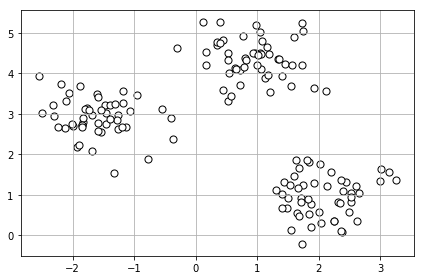

In [11]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], 
            c='white', marker='o', edgecolor='black', s=50)
plt.grid()
plt.tight_layout()
#plt.savefig('images/11_01.png', dpi=300)
plt.show()

In [32]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = Y

In [36]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, 
            init='random', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)

y_km = km.fit_predict(X)

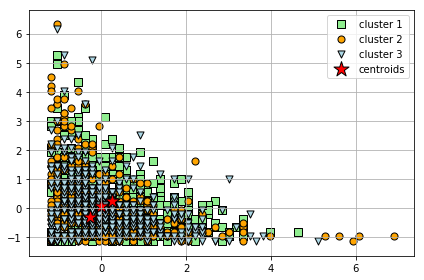

In [67]:
plt.scatter(X[y_km == 0, 0],
            X[y_km == 0, 1],
            s=50, c='lightgreen',
            marker='s', edgecolor='black',
            label='cluster 1')
plt.scatter(X[y_km == 1, 0],
            X[y_km == 1, 1],
            s=50, c='orange',
            marker='o', edgecolor='black',
            label='cluster 2')
plt.scatter(X[y_km == 2, 0],
            X[y_km == 2, 1],
            s=50, c='lightblue',
            marker='v', edgecolor='black',
            label='cluster 3')
plt.scatter(km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 1],
            s=250, marker='*',
            c='red', edgecolor='black',
            label='centroids')
plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()
#plt.savefig('images/11_02.png', dpi=300)
plt.show()

In [68]:
print('Distortion: %.2f' % km.inertia_)

Distortion: 412205.30


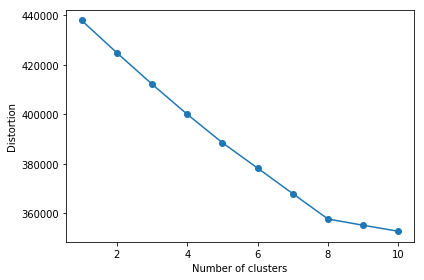

In [69]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
#plt.savefig('images/11_03.png', dpi=300)
plt.show()

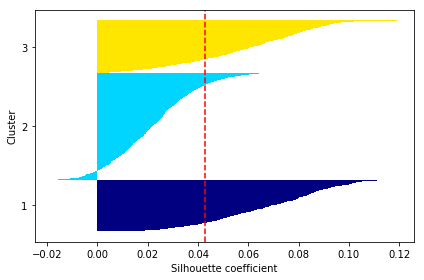

In [70]:
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples

km = KMeans(n_clusters=3, 
            init='k-means++', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)
y_km = km.fit_predict(X)

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()
#plt.savefig('images/11_04.png', dpi=300)
plt.show()

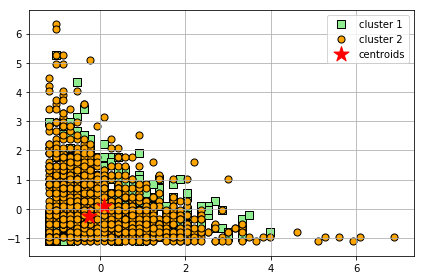

In [71]:
km = KMeans(n_clusters=2,
            init='k-means++',
            n_init=10,
            max_iter=300,
            tol=1e-04,
            random_state=0)
y_km = km.fit_predict(X)

plt.scatter(X[y_km == 0, 0],
            X[y_km == 0, 1],
            s=50,
            c='lightgreen',
            edgecolor='black',
            marker='s',
            label='cluster 1')
plt.scatter(X[y_km == 1, 0],
            X[y_km == 1, 1],
            s=50,
            c='orange',
            edgecolor='black',
            marker='o',
            label='cluster 2')

plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
            s=250, marker='*', c='red', label='centroids')
plt.legend()
plt.grid()
plt.tight_layout()
#plt.savefig('images/11_05.png', dpi=300)
plt.show()

In [72]:
df = pd.DataFrame(X)
df

,0,1,2,3,4,5,6,7,8,9,...,214,215,216,217,218,219,220,221,222,223
0,0.260556,-1.116873,-0.873836,-0.795133,-0.687565,-0.602939,0.639416,-1.194642,2.520356,-0.608894,...,-0.684636,-0.604072,-1.479008,-1.020020,-0.055320,-0.875829,1.906787,-0.684636,0.676473,-2.232914
1,-0.709705,0.096849,0.185934,-0.118485,-0.687565,-0.282802,0.695484,0.260615,-1.116137,-0.873836,...,0.076720,-0.604072,-1.248244,5.521277,-1.112666,-0.875829,-0.793842,-0.684636,-0.604713,-1.475831
2,0.260556,-0.510012,-0.343951,-0.795133,-0.687565,-0.602939,0.788542,-0.709557,0.096028,0.185934,...,-0.684636,-0.604072,-0.855274,0.096787,0.246778,1.247558,-0.568790,0.076720,-0.604713,-1.245310
3,0.422266,0.703710,-0.079008,-0.795133,-0.306559,-0.602939,0.799519,0.260615,-0.510054,-0.343951,...,3.502822,-0.604072,-0.214831,-1.179563,-0.961617,-0.875829,-0.793842,-0.684636,-0.604713,-0.852751
4,-1.033125,-1.116873,-0.608894,-0.795133,-0.687565,-0.602939,0.841861,0.422310,0.702110,-0.079008,...,-0.303958,0.036536,-1.106037,4.244927,-0.961617,2.043828,-0.793842,3.502822,-0.604713,-0.212981
5,-0.062864,0.248565,0.980762,0.332613,-0.687565,-0.282802,2.670638,-1.032947,-1.116137,-0.608894,...,-0.303958,0.356840,-0.978321,-1.179563,0.548877,-0.610406,0.331420,-0.303958,0.035880,-1.103252
6,-0.547995,1.007141,0.715819,0.107064,0.836460,-0.282802,0.595967,-0.062776,0.247548,0.980762,...,0.076720,-0.604072,-0.626586,-0.700932,0.548877,-0.344982,0.556472,-0.303958,0.356176,-0.975670
7,0.098846,-0.510012,0.715819,-0.569583,0.455454,-0.602939,0.736233,-0.547861,1.005151,0.715819,...,0.457398,-0.283768,-0.561809,0.415875,-0.961617,-0.079559,-0.793842,0.076720,-0.604713,-0.624304
8,0.907396,-0.206581,2.835361,-0.569583,1.598473,-0.602939,0.764884,0.098919,-0.510054,0.715819,...,-0.303958,-0.283768,-0.381073,1.054050,0.548877,1.512981,0.106368,0.457398,-0.284417,-0.559594
9,-0.386284,0.551995,-0.608894,0.332613,-0.687565,-0.602939,0.619824,0.907395,-0.207013,2.835361,...,-0.684636,-0.604072,-0.276603,0.096787,-0.508469,1.512981,-0.568790,-0.303958,-0.284417,-0.379048


In [75]:
from scipy.spatial.distance import pdist, squareform

row_dist = pd.DataFrame(squareform(pdist(df, metric='euclidean')))
row_dist

,0,1,2,3,4,5,6,7,8,9,...,1945,1946,1947,1948,1949,1950,1951,1952,1953,1954
0,0.000000,22.418223,21.416152,19.776839,21.237197,20.638901,20.620586,18.871123,18.593952,21.219156,...,20.503032,20.727862,21.192380,20.788192,21.304308,21.163462,21.339375,17.692864,19.781782,21.555026
1,22.418223,0.000000,21.245863,21.110963,19.548188,19.710956,20.607694,20.581911,18.858521,18.119200,...,20.350328,19.138099,20.281083,20.838067,20.674959,20.842102,20.538476,20.666126,17.341389,19.344618
2,21.416152,21.245863,0.000000,20.401332,20.063198,18.979973,18.607569,19.552004,20.284085,18.088514,...,20.520172,19.164205,18.254002,19.122016,19.675439,19.636689,20.055847,19.655639,19.577181,16.283940
3,19.776839,21.110963,20.401332,0.000000,20.330125,19.408376,18.906183,18.527687,19.784566,20.282070,...,19.949284,20.060207,19.015779,18.077833,19.030847,19.670371,19.343619,19.868767,19.462472,19.414214
4,21.237197,19.548188,20.063198,20.330125,0.000000,19.169487,19.550389,18.877380,19.000706,19.510810,...,19.545654,18.944591,20.012969,18.948667,17.907492,18.943679,19.478263,18.961701,19.804354,19.515282
5,20.638901,19.710956,18.979973,19.408376,19.169487,0.000000,17.868414,18.397402,18.425727,18.573388,...,19.608929,19.533149,18.022778,18.874326,17.574272,17.340410,18.498006,19.105730,17.776390,18.830019
6,20.620586,20.607694,18.607569,18.906183,19.550389,17.868414,0.000000,17.949881,18.450395,18.259586,...,20.253552,18.702724,19.415065,18.087839,18.917812,17.439128,16.931486,18.114604,19.213843,17.694027
7,18.871123,20.581911,19.552004,18.527687,18.877380,18.397402,17.949881,0.000000,17.942174,18.376153,...,19.306290,19.328067,18.509909,19.344295,18.165550,18.865852,17.137387,16.598009,18.028631,19.208191
8,18.593952,18.858521,20.284085,19.784566,19.000706,18.425727,18.450395,17.942174,0.000000,18.320940,...,20.281348,19.013120,19.508904,18.990080,19.262079,18.516788,19.062479,17.417352,16.741226,18.549550
9,21.219156,18.119200,18.088514,20.282070,19.510810,18.573388,18.259586,18.376153,18.320940,0.000000,...,17.461617,20.047411,18.841847,19.192242,18.974692,19.231016,18.264138,18.971202,17.262312,16.414235


In [77]:
# 2. correct approach: Condensed distance matrix
from scipy.cluster.hierarchy import linkage
row_clusters = linkage(pdist(df, metric='euclidean'), method='complete')
pd.DataFrame(row_clusters,
             columns=['row label 1', 'row label 2',
                      'distance', 'no. of items in clust.'],
             index=['cluster %d' % (i + 1) 
                    for i in range(row_clusters.shape[0])])

,row label 1,row label 2,distance,no. of items in clust.
cluster 1,967.0,1223.0,9.945417,2.0
cluster 2,968.0,1224.0,9.964726,2.0
cluster 3,890.0,970.0,10.052757,2.0
cluster 4,891.0,971.0,10.110237,2.0
cluster 5,892.0,972.0,10.134053,2.0
cluster 6,961.0,1217.0,10.134909,2.0
cluster 7,965.0,1221.0,10.153658,2.0
cluster 8,889.0,969.0,10.176347,2.0
cluster 9,962.0,1218.0,10.234135,2.0
cluster 10,963.0,1219.0,10.247152,2.0


In [78]:
# 3. correct approach: Input sample matrix

row_clusters = linkage(df.values, method='complete', metric='euclidean')
pd.DataFrame(row_clusters,
             columns=['row label 1', 'row label 2',
                      'distance', 'no. of items in clust.'],
             index=['cluster %d' % (i + 1)
                    for i in range(row_clusters.shape[0])])

,row label 1,row label 2,distance,no. of items in clust.
cluster 1,967.0,1223.0,9.945417,2.0
cluster 2,968.0,1224.0,9.964726,2.0
cluster 3,890.0,970.0,10.052757,2.0
cluster 4,891.0,971.0,10.110237,2.0
cluster 5,892.0,972.0,10.134053,2.0
cluster 6,961.0,1217.0,10.134909,2.0
cluster 7,965.0,1221.0,10.153658,2.0
cluster 8,889.0,969.0,10.176347,2.0
cluster 9,962.0,1218.0,10.234135,2.0
cluster 10,963.0,1219.0,10.247152,2.0


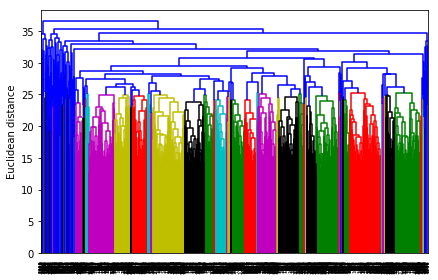

In [80]:
from scipy.cluster.hierarchy import dendrogram

# make dendrogram black (part 1/2)
# from scipy.cluster.hierarchy import set_link_color_palette
# set_link_color_palette(['black'])

row_dendr = dendrogram(row_clusters, 
                       #labels=labels,
                       # make dendrogram black (part 2/2)
                       # color_threshold=np.inf
                       )
plt.tight_layout()
plt.ylabel('Euclidean distance')
#plt.savefig('images/11_11.png', dpi=300, 
#            bbox_inches='tight')
plt.show()

# Как он это делает. Удивительно работает метод кластеризации из библиотеки - AgglomerativeClustering

In [143]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=3, 
                             affinity='euclidean', 
                             linkage='complete')
labels = ac.fit_predict(X)
print('Cluster labels: %s' % labels)

Cluster labels: [0 0 0 ... 0 0 0]


In [144]:
pd.Series(labels).value_counts()

0    2284
2     183
1      25
dtype: int64

In [146]:
df = pd.DataFrame({'labels':labels}, index=marked_dataset.index)
df[df.labels==1]

,labels
2018-04-04 14:00:00,1
2018-12-10 13:00:00,1
2018-12-12 13:00:00,1
2019-01-02 09:00:00,1
2019-01-02 10:00:00,1
2019-01-02 11:00:00,1
2019-01-02 12:00:00,1
2019-01-02 13:00:00,1
2019-01-02 14:00:00,1
2019-01-02 15:00:00,1
